<img src="./LogoSU.jpg" width="200" title="SU">

<br>

<center>
<h1>MU4PY115 - IA pour la physique</h1>
<h1>TP n°1 : méthode des k plus proches voisins</h1>
</center>

<br>

Cette séance de TP a pour objectifs de présenter l'algorithme des $k$ plus proches voisins et la méthode de validation croisée ainsi que d'introduire les bases de l'utilisation de la librairie scikit-learn (https://scikit-learn.org/stable/index.html) couramment utilisée en machine learning. Cette librairie inclu un grande nombre d'algorithmes d'apprentissage statistique (supervisés et non supervisés) ainsi que des fonctions facilitant la préparation des données et l'anayse des performances. Pour cette séance de TP ainsi que pour les suivantes, je vous encourage très fortement à consulter la documentation de cette librairie, notamment la section API qui contient la description précise de toutes les méthodes disponibles.

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random
%matplotlib inline

plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["font.size"] = 16

<br>

## Partie 1: jeu de données 2D

Afin de pouvoir visualiser les différentes étape du processus de traitement, nous allons commencer par travailler sur des données 2D générées artificiellement.

### Génération des données

- Utilisez la fonction <code>numpy.random.multivariate_normal()</code> afin de générer 2 variables $X_A$ et $X_B$ correspondant à 2 nuages de points (2D) contenant chacun n=200 points répartis suivant une distribution gaussien 2D. $X_A$ et $X_B$ seront donc des tableaux de dimension $n \times 2$.
- Représentez les données sur un graphe à l'aide des fonctions <code>pyplot.plot()</code> ou <code>pyplot.scatter()</code>. Vous choisirez le centre et la variance des distributions de façon à ce que les 2 nuages de points se recouvrent partiellement. N'oubliez pas de donner un nom aux axes et d'afficher la légende sur le graphe.
- Créez les variables $y_A$ et $y_B$  correspondant aux étiquettes des données, en prenant $y=0$ pour la classe A et $y=1$ pour la classe B.

[[-1.75586622e+00  1.18114340e+00  1.35387211e+00 -9.86668356e-01
   5.14454127e-01 -5.72810962e-01 -1.26468478e+00 -1.53612681e+00
  -2.07253126e+00 -4.05886016e-01 -1.60795036e+00 -2.53002759e+00
  -3.82140661e-01 -3.48974355e-01 -1.63159403e+00 -1.05437827e+00
  -1.30758005e+00 -1.36414279e+00 -1.16402510e+00 -2.82492173e-01
  -1.48902565e+00 -1.80973662e+00 -6.65657844e-01 -1.92452111e+00
  -1.54506595e+00 -1.08258414e+00 -1.73656398e+00 -3.75393269e+00
  -5.94851956e-01 -1.50159210e+00 -9.47326100e-01 -8.41640036e-01
  -3.43828558e+00 -4.03975078e-01 -4.47831936e-01 -1.19277588e+00
  -2.25596300e+00 -2.64698060e-01 -7.11369840e-01 -5.51701067e-01
  -1.52353660e+00 -1.76322212e+00 -3.12487014e+00 -2.77484368e-01
  -5.03539075e-01 -1.99244234e+00 -2.23609309e+00 -8.89073297e-02
  -1.03625103e+00 -2.23802610e-01 -1.96841468e-01  6.40234017e-02
  -2.28608295e+00  2.40055352e-02 -2.34534764e+00 -1.55920883e+00
   4.32605345e-01 -2.37795248e+00  1.73903729e-01 -7.78530283e-01
  -1.50321

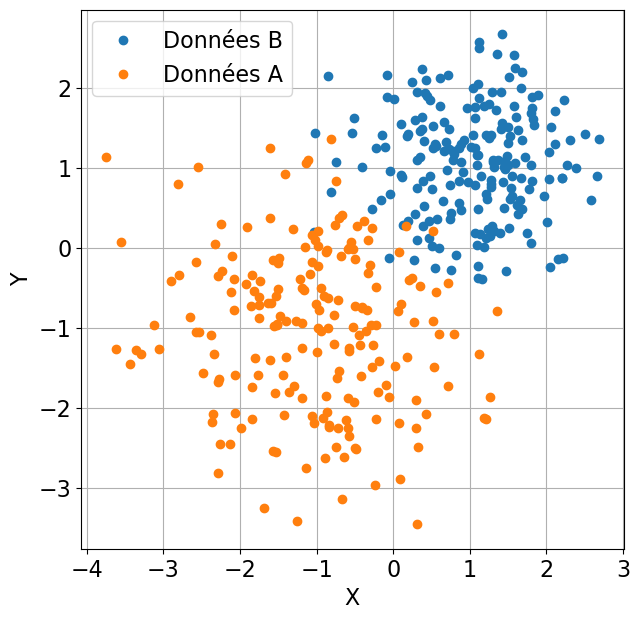

In [244]:
# Création des données correspondant aux deux classes
mean_A = [-1,-1]
cov_A = [[1,0],[0,1]]
mean_B = [1,1]
cov_B = [[0.5,0],[0,0.5]]

X_A = np.ones((2,200))
X_B = np.ones((2,200))

X_A[0], X_A[1] = numpy.random.multivariate_normal(mean_A, cov_A, size = 200).T
X_B[0], X_B[1] = numpy.random.multivariate_normal(mean_B, cov_B, size = 200).T
print(X_A, X_B[0].shape)

# A et B et représentation des données sur un graphe
plt.plot(X_B[0],X_B[1],'o', label='Données B')
plt.plot(X_A[0], X_A[1],'o', label='Données A')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [245]:
Y_A = np.zeros(200)
Y_B = np.ones(200)

- A l'aide des fonctions <code>numpy.append()</code> ou <code>numpy.concatenate()</code>, rassemblez les 2 groupes de données sous la forme d'une variable $X$ de dimension $2n \times 2$ et une variable $y$ de dimension $2n$. Affichez à l'écran les dimensions des 2 variables créées.

In [246]:
# Création des variables $X$ et $y$
X = np.zeros((2,400))
X[0] = numpy.append(X_A[0],X_B[0])
X[1] = numpy.append(X_A[1],X_B[1])
Y = numpy.append(Y_A,Y_B)

print(X)
print(Y.shape)

[[-1.75586622e+00  1.18114340e+00  1.35387211e+00 -9.86668356e-01
   5.14454127e-01 -5.72810962e-01 -1.26468478e+00 -1.53612681e+00
  -2.07253126e+00 -4.05886016e-01 -1.60795036e+00 -2.53002759e+00
  -3.82140661e-01 -3.48974355e-01 -1.63159403e+00 -1.05437827e+00
  -1.30758005e+00 -1.36414279e+00 -1.16402510e+00 -2.82492173e-01
  -1.48902565e+00 -1.80973662e+00 -6.65657844e-01 -1.92452111e+00
  -1.54506595e+00 -1.08258414e+00 -1.73656398e+00 -3.75393269e+00
  -5.94851956e-01 -1.50159210e+00 -9.47326100e-01 -8.41640036e-01
  -3.43828558e+00 -4.03975078e-01 -4.47831936e-01 -1.19277588e+00
  -2.25596300e+00 -2.64698060e-01 -7.11369840e-01 -5.51701067e-01
  -1.52353660e+00 -1.76322212e+00 -3.12487014e+00 -2.77484368e-01
  -5.03539075e-01 -1.99244234e+00 -2.23609309e+00 -8.89073297e-02
  -1.03625103e+00 -2.23802610e-01 -1.96841468e-01  6.40234017e-02
  -2.28608295e+00  2.40055352e-02 -2.34534764e+00 -1.55920883e+00
   4.32605345e-01 -2.37795248e+00  1.73903729e-01 -7.78530283e-01
  -1.50321

- Mélangez les données à l'aide de la fonction <code>numpy.random.shuffle()</code>.
- En utilisant les variables $X$ et $y$, représentez à nouveau les données sur un graphe.

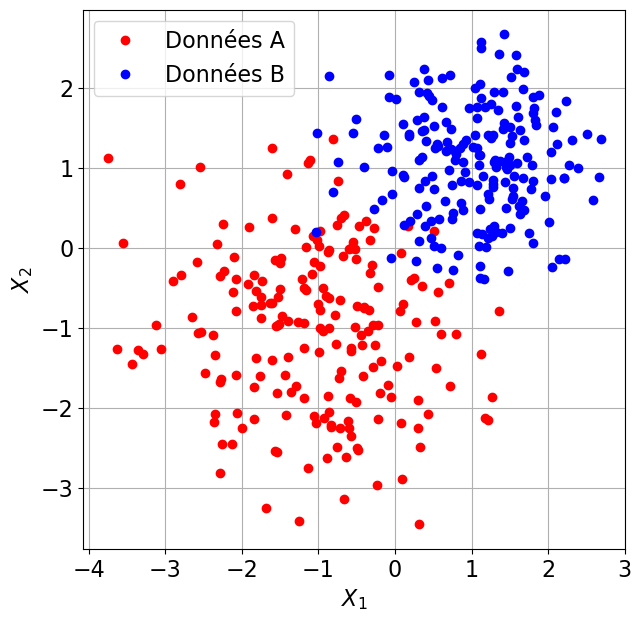

In [247]:
# Mélange des données
arr = np.arange(400)
numpy.random.shuffle(arr)
arr

newX = X.copy()
newY = Y.copy()
for i in range(400):
    newX[0][i] = X[0][arr[i]]
    newX[1][i] = X[1][arr[i]]
    newY[i] = Y[arr[i]]

# A et B et représentation des données sur un graphe
plt.plot(newX[0,newY==0],newX[1, newY==0],'ro', label='Données A')
plt.plot(newX[0,newY==1],newX[1, newY==1],'bo', label='Données B')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()


- Assemblez les éléments définis ci-dessus pour créer une fonction prenant en argument le nombre $n$ de données dans chaque classe, le centre et la variance de chaque distribution, et renvoyant en sortie les variables $X$ et $y$ après mélange.

In [248]:
def create_data(center_A : [float], sig_A: float, n_A: int, center_B: [float], sig_B: float, n_B: int):
    
    #Création $X_A$ et $X_B$
    
    mean_A = center_A
    cov_A = [[sig_A**2,0],[0,sig_A**2]]
    mean_B = center_B
    cov_B = [[sig_B**2,0],[0,sig_B**2]]
    
    X_A = np.ones((2,n_A))
    X_B = np.ones((2,n_B))
    
    X_A[0], X_A[1] = numpy.random.multivariate_normal(mean_A, cov_A, size = n_A).T
    X_B[0], X_B[1] = numpy.random.multivariate_normal(mean_B, cov_B, size = n_B).T
    
    # Création $Y_A$ et $Y_B$
    
    Y_A = np.zeros(n_A)
    Y_B = np.ones(n_B)
    
    # Création des variables $X$ et $y$
    X = np.zeros((2,n_A+n_B))
    X[0] = numpy.append(X_A[0],X_B[0])
    X[1] = numpy.append(X_A[1],X_B[1])
    Y = numpy.append(Y_A,Y_B)
    
    # Mélange des données
    arr = np.arange(n_A + n_B)
    numpy.random.shuffle(arr)
    
    newX = X.copy()
    newY = Y.copy()
    for i in range(n_A + n_B):
        newX[0][i] = X[0][arr[i]]
        newX[1][i] = X[1][arr[i]]
        newY[i] = Y[arr[i]]
    
    return newX.T, newY.T

### Partitionnement des données

Ces données vont maintenant être utilisées pour construire une fonction capable de prédire la classe à laquelle doit appartenir une nouvelle donnée $x_{new}$. Pour évaluer les performances de cette fonction, il faut que l'on dispose de données pour lesquelles on connaît la classe correspondante. Cependant, il n'est pas possible d'utiliser les mêmes données à la fois pour entraîner l'algorithme et pour l'évaluer car cette évaluation serait faussée. L'évaluation du modèle doit impérativement être effectuée avec des données qui n'ont pas été utilisées pour l'apprentissage afin de refléter la performance que l'on peut attendre du modèle pour de nouvelles données.

<br>

- Utilisez la fonction <code>train_test_split()</code> du module <code>sklearn.model_selection</code> afin de séparer les données $(X,y)$ initialement créées en un jeu d'entraînement contenant 70% des données et un jeu de test contenant les 30% restant.

In [249]:
# séparation des données à l'aide de la fonction train_test_split()
from sklearn.model_selection import train_test_split

X,y = create_data([-1,-1],0.5,300,[1,1],0.9,50)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify=y)
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : (244, 2), X_test : (106, 2), y_train : (244,), y_test : (106,)


- Comment doit-on paramétrer cette fonction pour pouvoir obtenir le même partitionnement si l'on utilise cette fonction plusieurs fois sur le mêmes données $(X,y)$ ?

On met le paramètre random_state égal au même int !

- Comment doit-on paramétrer cette fonction pour que la répartition des étiquettes dans les 2 jeux créés soit identique à celle du jeu de départ ?

On met une valeur dans stratify.

### Entraînement et évaluation d'un modèle avec scikit-learn

Vous allez maintenant appliquer aux données d'entraînement le modèle des $k$ plus proches voisins implémenté dans la bibliothèque scikit-learn. Tous les algorithmes d'aprentissage supervisés implémentés dans cette bibliothèque s'utilisent de la même façon. Un modèle ($k$ plus proches voisins, régression linéaire, réseau de neurones, etc) correspond à une classe python. Il faut donc tout d'abord
1. importer la classe correspondante
2. créer une instance de cette classe, c'est à dire créer un objet du type de cette classe

Pour un classificateur de type $k$ plus proches voisins cela donnerait:

```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
```

<br>

Lors de l'étape d'instanciation, il est possible de passer en argument différents paramètres permettant de contrôler le fonctionnement de l'algorithme. Dans le cas d'un modèle de $k$ plus proches voisins, on peut par exemple indiquer le nombre de plus proches voisins considérés.

On peut ensuite entraîner le modèle grâce à la méthode <code>.fit()</code> et calculer le score du modèle grâce à la méthode <code>.score()</code>.<br>

Enfin, la méthode <code>.predict()</code> permet de prédire la classe pour de nouvelles données.

<br>

- Entraînez un modèle de type <code>KNeighborsClassifier()</code> pour $k=1$.
- Calculez le score sur les jeux d'entraînement et de test. A quelle grandeur correspond la valeur renvoyée ? Comment pouvez-vous expliquer la valeur obtenue pour le score d'entraînement ?

Elle équivaut à la moyenne de la prédiction (0 si fausse, 1 si correcte). On obtient 1 pour le score d'entrainement car tout les points d'entrainement sont les plus proches d'eux même, et sont donc prédits avec leur propre étiquette

- Calculez les étiquettes prédites pour les données de test. Représentez sur un graphe les données d'entraînement et les données de test avec leur étiquette vraie et leur étiquette prédite.

1.0
0.9905660377358491


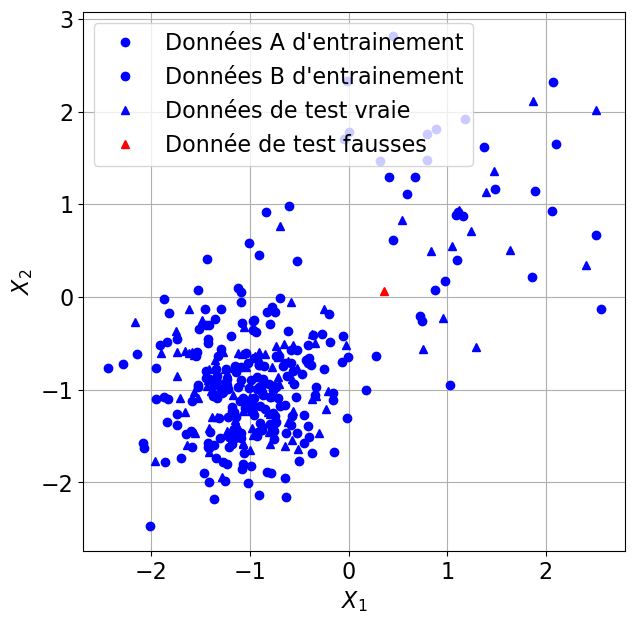

In [250]:
# Entraînement et évaluation du modèle pour k=1
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1,weights='distance')
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
y_predict = model.predict(X_test)
print(model.score(X_test,y_test))

# A et B et représentation des données sur un graphe
plt.plot(X_train.T[0,y_train==0],X_train.T[1, y_train==0],'bo', label="Données A d'entrainement")
plt.plot(X_train.T[0,y_train==1],X_train.T[1, y_train==1],'bo', label="Données B d'entrainement")

plt.plot(X_test.T[0,y_predict==y_test],X_test.T[1, y_predict==y_test],'b^', label="Données de test vraie")
plt.plot(X_test.T[0,y_predict!=y_test],X_test.T[1, y_predict!=y_test],'r^', label="Donnée de test fausses")

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()

- Entraînez à nouveau un modèle de $k$ plus proches voisins sur ces données, mais pour $k=5$.

1.0
0.9905660377358491


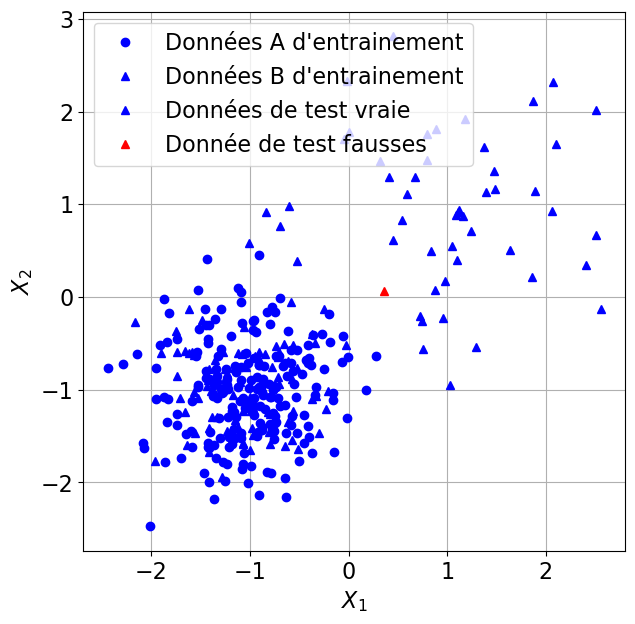

In [251]:
# Entraînement et évaluation du modèle pour k=5
model = KNeighborsClassifier(n_neighbors=5,weights='distance')
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
y_predict = model.predict(X_test)
print(model.score(X_test,y_test))

# A et B et représentation des données sur un graphe
plt.plot(X_train.T[0,y_train==0],X_train.T[1, y_train==0],'bo', label="Données A d'entrainement")
plt.plot(X_train.T[0,y_train==1],X_train.T[1, y_train==1],'b^', label="Données B d'entrainement")

plt.plot(X_test.T[0,y_predict==y_test],X_test.T[1, y_predict==y_test],'b^', label="Données de test vraie")
plt.plot(X_test.T[0,y_predict!=y_test],X_test.T[1, y_predict!=y_test],'r^', label="Donnée de test fausses")

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()

- Que peut-on constater ?

### Evolutions des performances en fonction de la valeur de k

- A l'aide d'une boucle, créez et entraînez un modèle de $k$ plus proches voisins en faisant varier $k$ entre 1 et 50.
- Pour chaque modèle calculez le score obtenu pour les données d'entraînement et pour les données de test.
- Représentez ces scores sur un graphe, en fonction de $k$.

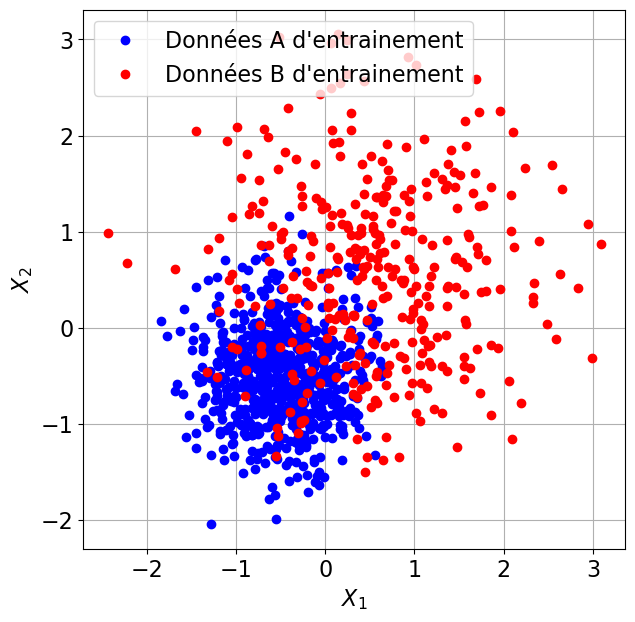

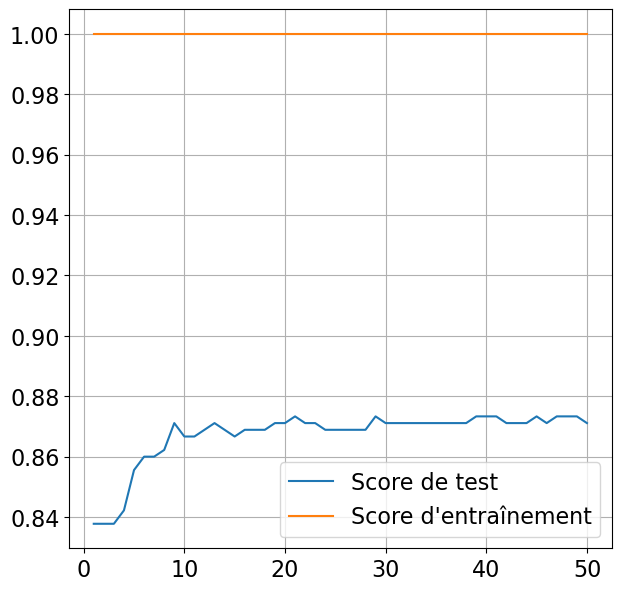

In [252]:
# Calcul du score d'entraînement et du score de test pour des valeurs de $k$ comprises 
# entre 1 et 50

X,y = create_data([-0.5,-0.5],0.5,1000,[0.5,0.5],0.9,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify=y)
# A et B et représentation des données sur un graphe
plt.plot(X_train.T[0,y_train==0],X_train.T[1, y_train==0],'bo', label="Données A d'entrainement")
plt.plot(X_train.T[0,y_train==1],X_train.T[1, y_train==1],'ro', label="Données B d'entrainement")

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()

def scoreKneighbors(k: int):
    model = KNeighborsClassifier(n_neighbors=k,weights='distance')
    model.fit(X_train,y_train)
    
    score_train = model.score(X_train,y_train)
    score_test = model.score(X_test,y_test)
    
    return score_test, score_train

list_score_test = []
list_score_train = []
for i in range(1,51):
    score_test, score_train = scoreKneighbors(i)
    list_score_test.append(score_test)
    list_score_train.append(score_train)

k = np.arange(1,51)
plt.plot(k,list_score_test, label="Score de test")
plt.plot(k,list_score_train, label="Score d'entraînement")
plt.legend()
plt.grid()
plt.show()


- Est-ce que l'utilisation de ces courbes constitue une bonne méthode pour déterminer la valeur optimale de $k$ ?

### Méthode de validation croisée

- Utilisez la fonction <code>cross_validate()</code> du module <code>sklearn.model_selection</code> afin de calculer les scores pour $k$=1 dans le cas d'une validation croisée à 5 blocs sur les données d'entraînement.
- Affichez la valeur du score pour chaque bloc ainsi que le score moyen.

In [253]:
# validation croisée à 5 blocs sur les données d'entraînement pour k=1
from sklearn.model_selection import cross_validate

cross_validate(model, X_train, y_train, cv=5)['test_score'].mean()

0.8971428571428571

- Utilisez la fonction <code>GridSearchCV()</code> du module <code>sklearn.model_selection</code> afin de déterminer le nombre optimal de voisins $k$. Vous afficherez à l'écran le score de validation pour toutes les valeurs de $k$ comprises entre 1 et 20 (utilisez l'attribut <code>.cv_results_</code>).

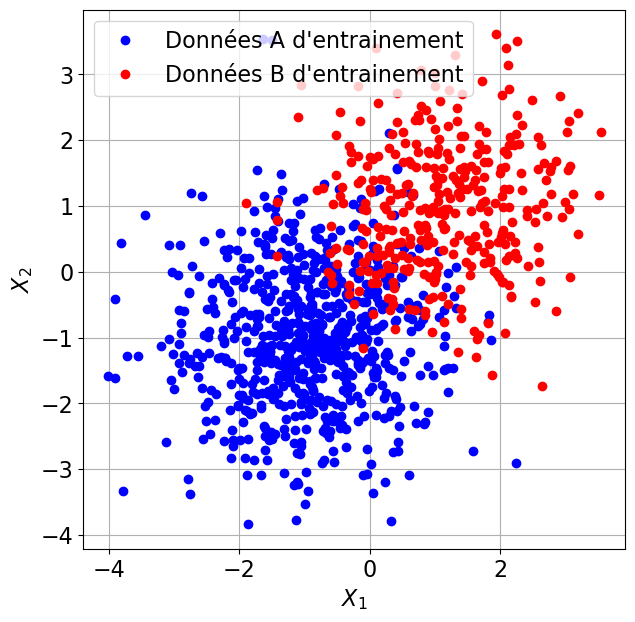

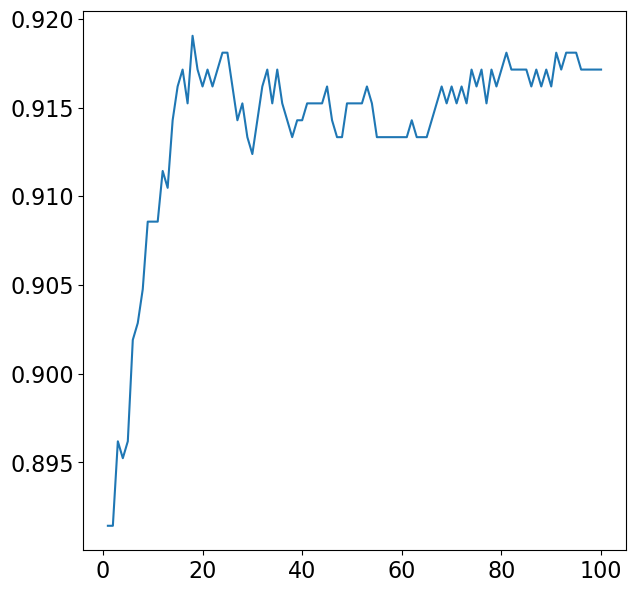

Best k is 17


In [254]:
# Détermination du paramètre k optimal par recherche sur grille avec validation croisée
from sklearn.model_selection import GridSearchCV

X,y = create_data([-1,-1],1,1000,[1,1],1,500)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify=y)
# A et B et représentation des données sur un graphe
plt.plot(X_train.T[0,y_train==0],X_train.T[1, y_train==0],'bo', label="Données A d'entrainement")
plt.plot(X_train.T[0,y_train==1],X_train.T[1, y_train==1],'ro', label="Données B d'entrainement")

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()

parameter = {'n_neighbors': range(1,101)}
knn = KNeighborsClassifier(weights='distance')
GSCV = GridSearchCV(knn, parameter, cv=5)
GSCV.fit(X_train, y_train)
results = GSCV.cv_results_['mean_test_score']

plt.plot(np.arange(1,101), results)
plt.show()

best_k = results.argmax()
print(f"Best k is {best_k}")

- Entraînez le modèle avec l'ensemble des données d'entraînement pour la valeur optimale de $k$ puis évaluez les performances du modèle ainsi obtenu pour les données de test.

In [255]:
# Modèle final
model = KNeighborsClassifier(n_neighbors=62,weights='distance')
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
y_predict = model.predict(X_test)
print(model.score(X_test,y_test))



1.0
0.9288888888888889


<br>

## Partie 2: classification sur le dataset *iris*

Le module <code>datasets</code> de scikit-learn inclu plusieurs jeux de données permettant de tester facilement les algorithmes de la librairie: https://scikit-learn.org/stable/datasets.html

Chacun de ces jeux de données se présente sous la forme d'un dictionnaire comportant les clés suivantes:
- data : matrice $X$ des données
- target : vecteur $y$ des données
- target_names : liste contenant les noms des différentes classes dans le cas de données catégorielles
- feature_names : liste contenant les noms des différents descripteurs de $X$
- DESCR : informations concernant le jeu de données

Lors de l'importation du dataset, l'option <code>return_X_y</code> permet de ne récupérer uniquement *data* et *target*.

### Observation du jeu de données *iris*

- Importez le dataset *Iris* et affichez les informations décrivant ce jeu de données.

In [256]:
# importation des données du dataset Iris et affichage du descriptif
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- Affichez les noms des descripteurs et des étiquettes de ce jeu de données.

In [257]:
# Noms des descripteurs et des étiquettes
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


- Affichez les dimensions des données et des étiquettes.

In [258]:
# Noms des descripteurs et des étiquettes
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


La librairie <code>pandas</code> inclu diverses fonctionnalités utiles pour l'exploration de ce type de dataset.

In [259]:
# Importation de pandas
import pandas as pd

Lors de l'importation du dataset, l'option <code>as_frame</code> permet d'obtenir les données (*data* et *target*) sous la forme de *dataframes* pandas. Les méthodes <code>.info()</code> et <code>.describe()</code> permettent alors d'afficher certaines informations et statistiques relatives aux données.

In [260]:
# Affichage des informations relatives aux données X et y
iris = datasets.load_iris(as_frame=True)
iris['data'].info()
iris['target'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


### Entraînement d'un modèle kNN sur *iris*

- Séparez les données en 1 jeu d'entraînement et 1 jeu de test
- A l'aide d'une recherche sur grille et d'une validation croisée, déterminez le paramètre $k$ optimal pour un modèle de $k$ plus proches voisins
- Déterminez l'erreur de généralisation à l'aide du jeu de test

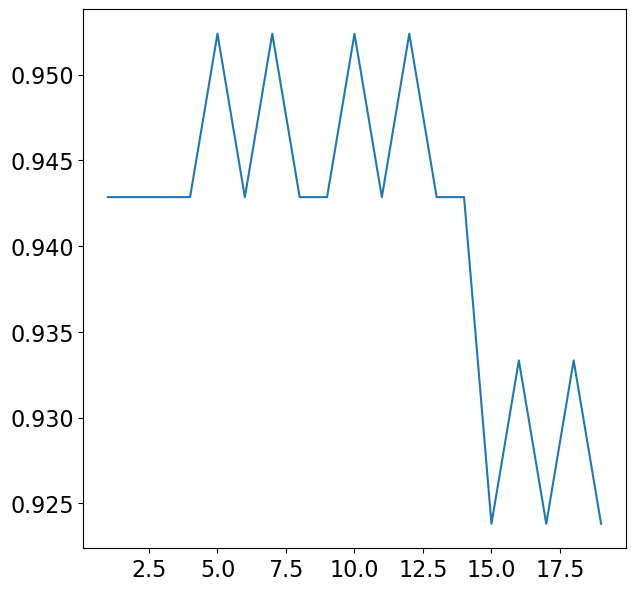

Best k is 4
1.0
Score de généralisation : 0.9777777777777777


In [261]:
X = iris['data']
y = iris['target']

#On split les données pour récupérer les données de train et de test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=1, stratify=y)

# On utilise une validation croisée pour déterminer le meilleur k
parameter = {'n_neighbors': range(1,20)}
knn = KNeighborsClassifier(weights='distance')
GSCV = GridSearchCV(knn, parameter, cv=5)
GSCV.fit(X_train, y_train)
results = GSCV.cv_results_['mean_test_score']

plt.plot(np.arange(1,20), results)
plt.show()

best_k = results.argmax()
print(f"Best k is {best_k}")

# On applique ensuite ce k sur notre modèle
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(f"Score de généralisation : {model.score(X_test,y_test)}")

<br>

## Partie 3: compléments

### Codage du partitionnement des données et de l'algorithme des *k* plus proches voisins

Afin de mieux appréhender le fonctionnement des principales fonctions utilisées lors de cette séance, nous allons en coder une version simplifiée en python. Pour tester votre code, commencez par créer un jeu de données 2D similaires à celles utilisées dans la première partie.

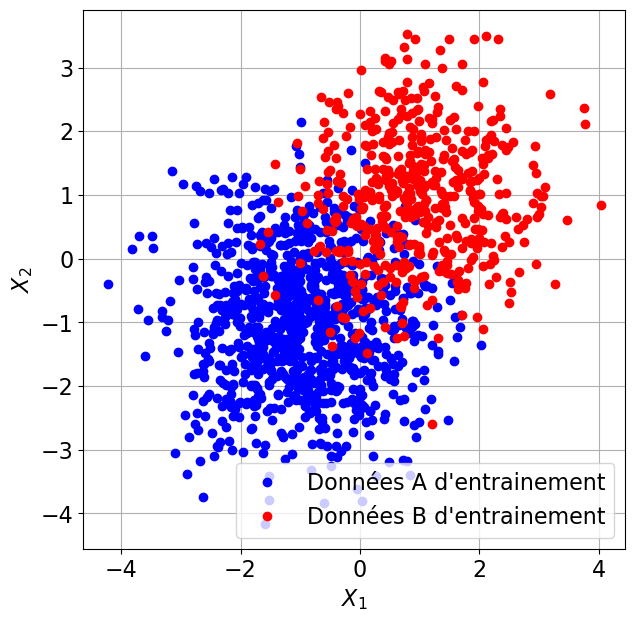

In [267]:
# Création d'un jeu de données

def create_data(center_A : [float], sig_A: float, n_A: int, center_B: [float], sig_B: float, n_B: int):
    
    #Création $X_A$ et $X_B$
    
    mean_A = center_A
    cov_A = [[sig_A**2,0],[0,sig_A**2]]
    mean_B = center_B
    cov_B = [[sig_B**2,0],[0,sig_B**2]]
    
    X_A = np.ones((2,n_A))
    X_B = np.ones((2,n_B))
    
    X_A[0], X_A[1] = numpy.random.multivariate_normal(mean_A, cov_A, size = n_A).T
    X_B[0], X_B[1] = numpy.random.multivariate_normal(mean_B, cov_B, size = n_B).T
    
    # Création $Y_A$ et $Y_B$
    
    Y_A = np.zeros(n_A)
    Y_B = np.ones(n_B)
    
    # Création des variables $X$ et $y$
    X = np.zeros((2,n_A+n_B))
    X[0] = numpy.append(X_A[0],X_B[0])
    X[1] = numpy.append(X_A[1],X_B[1])
    Y = numpy.append(Y_A,Y_B)
    
    # Mélange des données
    arr = np.arange(n_A + n_B)
    numpy.random.shuffle(arr)
    
    newX = X.copy()
    newY = Y.copy()
    for i in range(n_A + n_B):
        newX[0][i] = X[0][arr[i]]
        newX[1][i] = X[1][arr[i]]
        newY[i] = Y[arr[i]]
    
    return newX.T, newY.T

X, y = create_data([-1,-1],1,1000,[1,1],1,500)

# A et B et représentation des données sur un graphe
plt.plot(X.T[0,y==0],X.T[1, y==0],'bo', label="Données A d'entrainement")
plt.plot(X.T[0,y==1],X.T[1, y==1],'ro', label="Données B d'entrainement")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid()
plt.show()

#### Partitionnement des données

- Créez une fonction <code>partage(X,y)</code> qui sépare les données en un jeu d'entraînement $(X_{train},y_{train})$ contenant 75% des données tirées aléatoirement et un jeu de test $(X_{test},y_{test})$ contenant les 25% restant.
- Représentez sur un graphe les données d'entraînement et sur un autre graphe les données de test.

In [7]:
# partage des données entre un jeu d'entraînement et un jeu de test

def partage(X, y):
    total_size = X.size
    size_train = int(0.75*total_size)
    size_test = total_size - size_train
    print(f"Total : {total_size}, Test : {size_test}, train : {size_train}")
    
    X_test = np.empty(size_test)
    X_train = np.empty(size_train)
    
    for i in range():
        
        
    return None


#### Méthode des $k$ plus proches voisins

- Ecrire une fonction <code>distances(X,x_new)</code> qui calcule la distance euclidienne entre le point $x_{new}$ et chacun des points de $X$.

In [8]:
# Fonction renvoyant les distances entre un point X_new et chacun des points de X

def distances(X, x_new):
    # calcul de la distance entre X_new et les données X
    # ...
    return None


- Modifiez la fonction précédente afin qu'elle renvoie en sortie les indices correspondant aux $k$ plus proches voisins de $x_{new}$.

In [9]:
# Fonction renvoyant les indices des k plus proches voisins

def kNN(X, x_new, k):
    # indices des k plus proches voisins
    # ...
    return None


- Afin de tester le bon fonctionnement de la fonction kNN(), représentez sur un graphe les données d'entraînement et, pour un point $x_{new}$ de votre choix, repérez sur le graphe les 4 plus proches voisins identifiés par la fonction. 

In [44]:
# Test de la fonction kNN()



- La dernière étape consiste à attribuer à $x_{new}$ l'étiquette majoritaire des $k$ plus proches voisins. Que peut-on faire en cas d'égalité ?

In [11]:
# fonction attribuant l'étiquette y_new à la donnée x_new

def predict_single(X, y, x_new, k):
    # fonction attribuant l'étiquette y_new à la donnée x_new
    # ...
    return None


#### Calcul du score du modèle sur l'ensemble de test

- Ecrivez une fonction qui permette de prédire l'étiquette de chaque point de l'ensemble $X_{test}$. Calculez le score d'accuracy du modèle. Comparez avec le résultat obtenu en utilisant le modèle de k plus proches voisins de scikit-learn.

<br>

Remarque: pour une exécution plus rapide, il serait nettement préférable de vectoriser les calculs et de faire appel à la fonction <code>numpy.spatial.distance.cdist()</code>  pour calculer les distances entre les données de test et les données d'entraînement.

In [12]:
# fonction prédisant l'étiquette de chacun des points de X_new et calcul du score du modèle

def predict(X, y, Z, k):
    # fonction prédisant l'étiquette de chacun des points de X_new
    # ...
    return None


### Représentation des régions de décision

- On considère à nouveau un jeu de données 2D telles que celles utilisées dans la première partie. Après avoir entraîné un modèle de k plus proches voisins avec k=1, représentez dans le plan $(x_1,x_2)$ les régions associées aux classes A et B à l'aides de couleurs différentes. Vous pourrez pour cela utiliser la fonction <code>matplotlib.pyplot.imshow()</code>. Vous ferez également apparaître les points de données sur cette carte.
- Représentez une telle carte pour d'autres valeurs de $k$ (5 et 25 par exemple).
- Commentez.